# Practical 1
by 23AIML056 - Kavya

## importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *

In [2]:
df = pd.read_csv("dataset/car_price_prediction.csv")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


## Basic information of data

In [3]:
df.shape

(19237, 18)

there are 18 features and 19237 enteries in the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

There are 5 numerical columns and 13 categorical columns.

### Statistics of our data

In [5]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


## EDA

In [6]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns
print(f"numerical cols: {numerical_cols}")
print(f"categorical cols: {categorical_cols}")

numerical cols: Index(['ID', 'Price', 'Prod. year', 'Cylinders', 'Airbags'], dtype='object')
categorical cols: Index(['Levy', 'Manufacturer', 'Model', 'Category', 'Leather interior',
       'Fuel type', 'Engine volume', 'Mileage', 'Gear box type',
       'Drive wheels', 'Doors', 'Wheel', 'Color'],
      dtype='object')


### Numerical columns

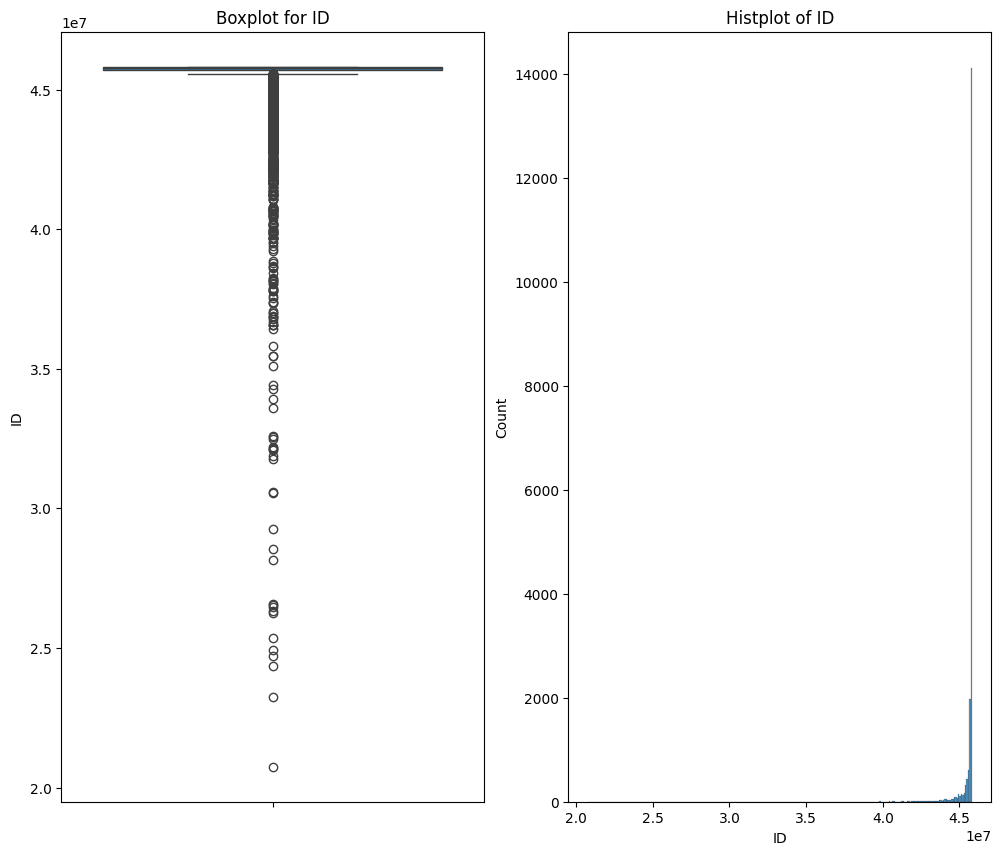

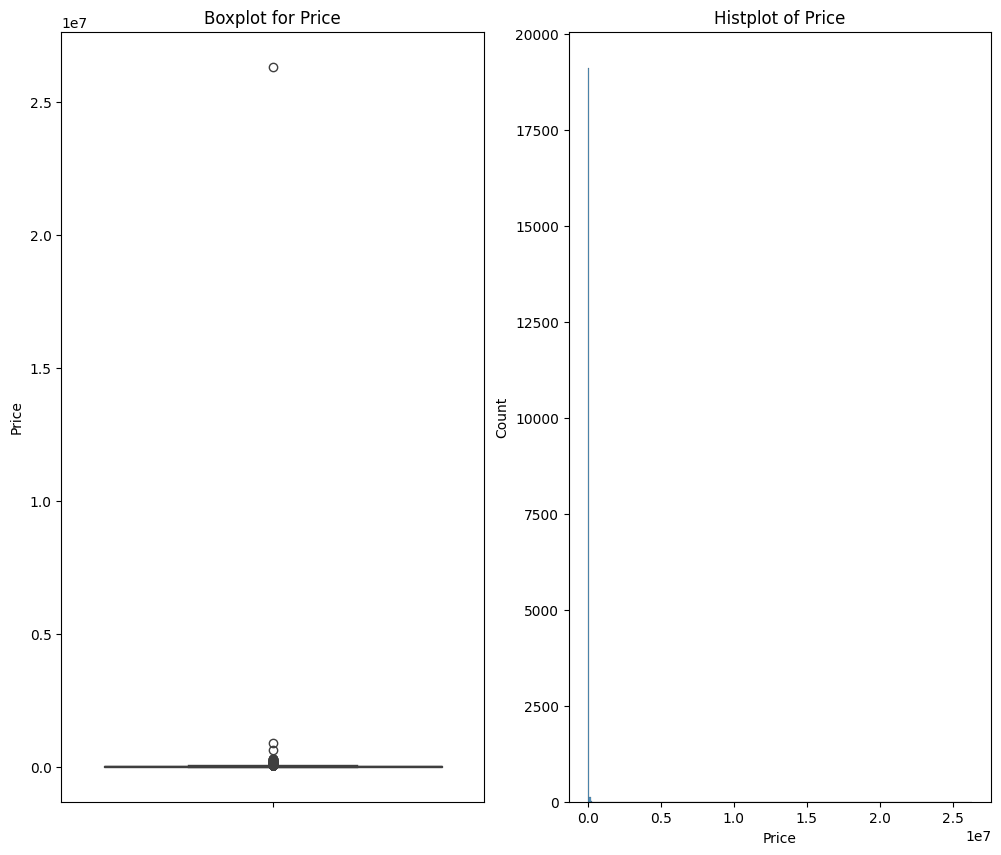

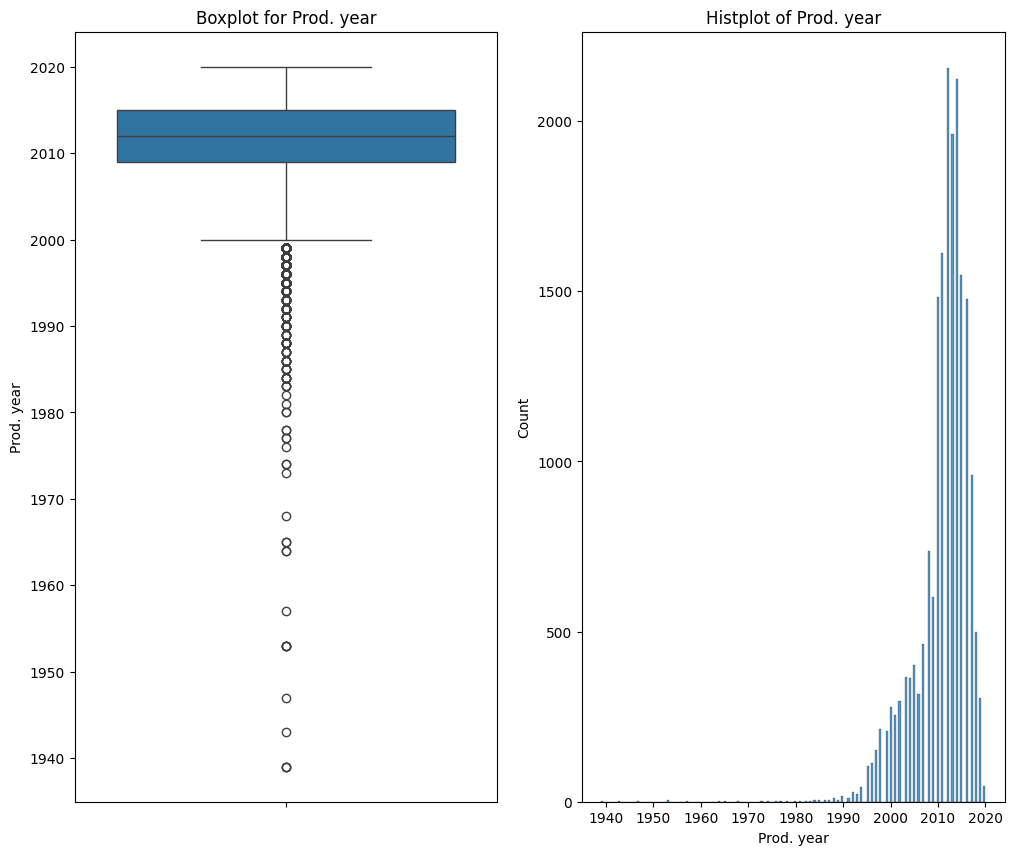

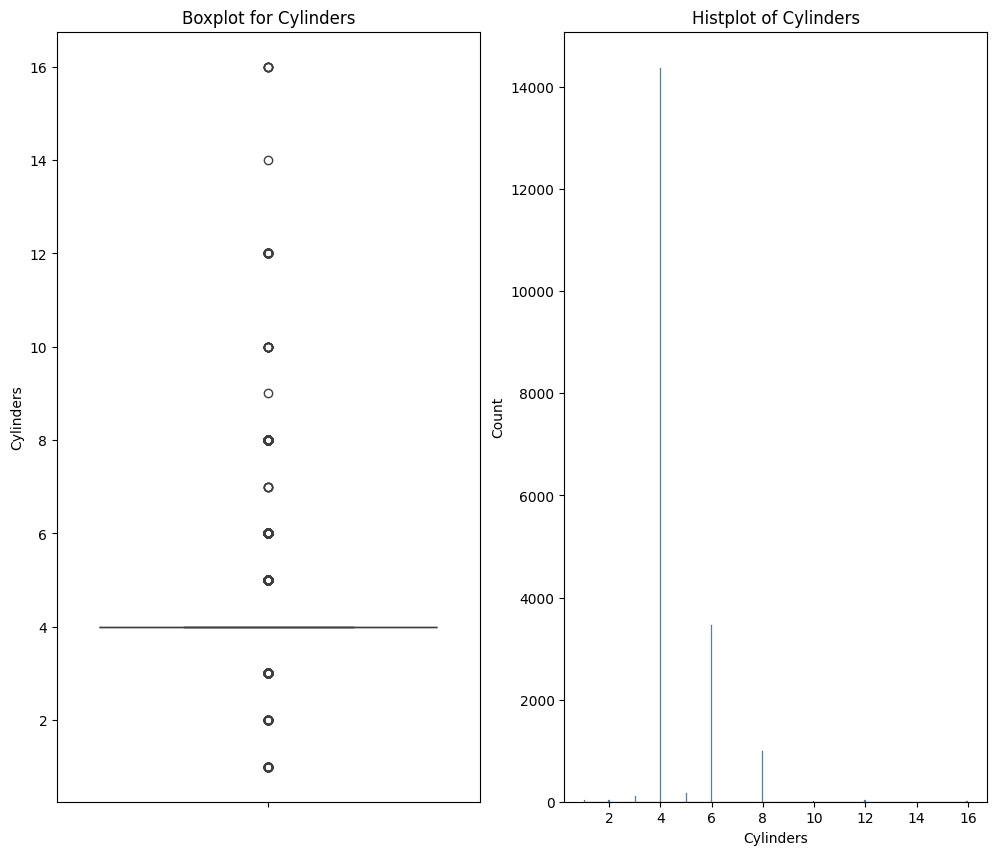

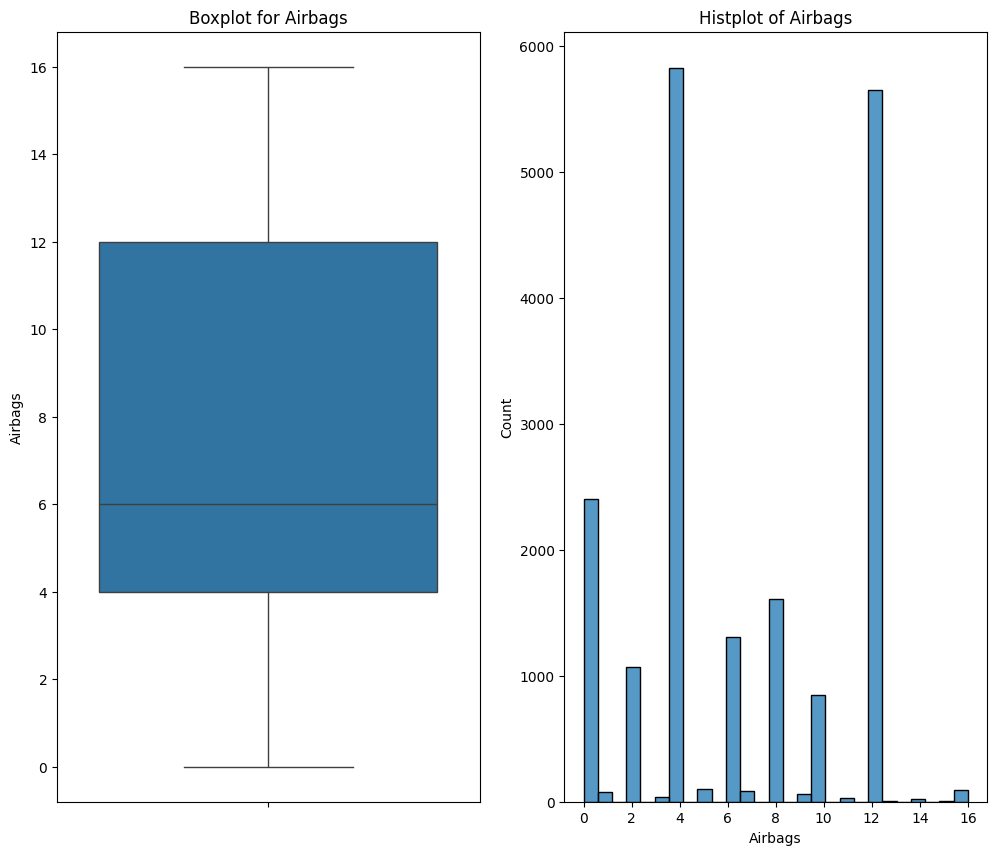

In [7]:
for col in numerical_cols:
    plt.figure(figsize=(12,10))
    plt.subplot(1,2,1)
    plt.title(f"Boxplot for {col}")
    sns.boxplot(df[col])
    plt.subplot(1,2,2)
    plt.title(f"Histplot of {col}")
    sns.histplot(df[col])
    plt.show()

#### Conclusions:
- our data has a lot of outliers
- none of our data is normally distributed

### Categorical columns

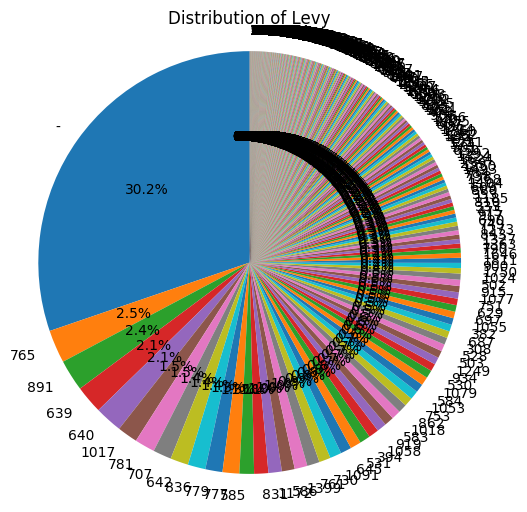

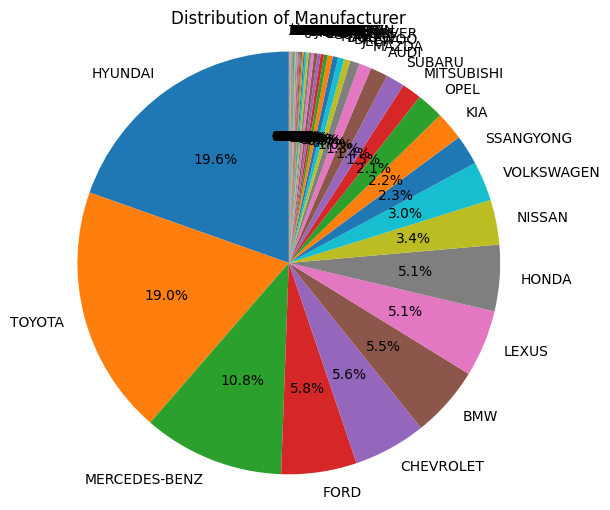

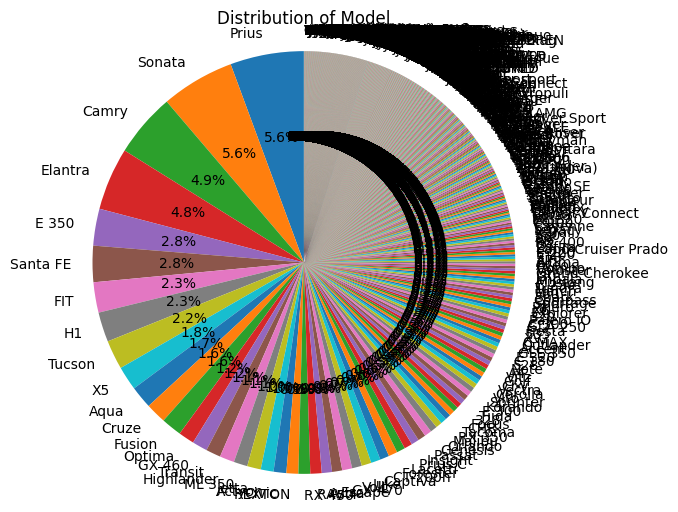

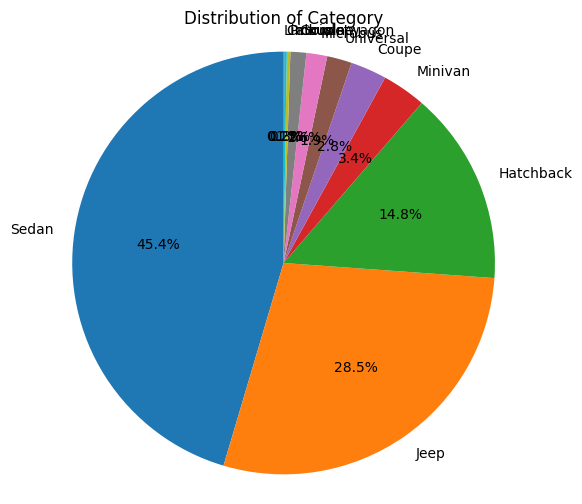

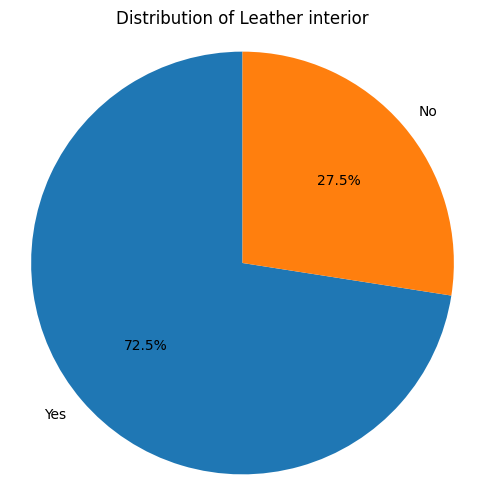

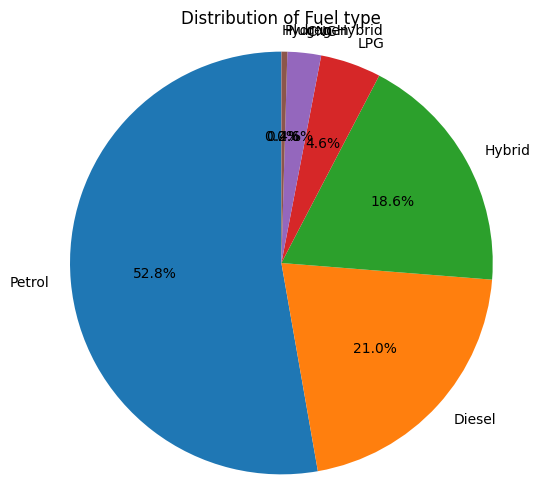

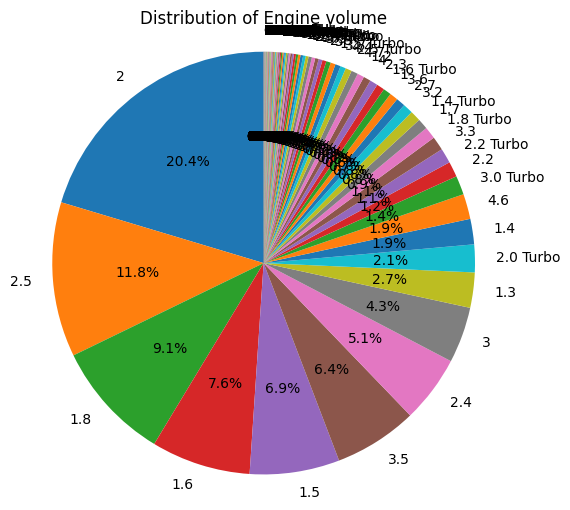

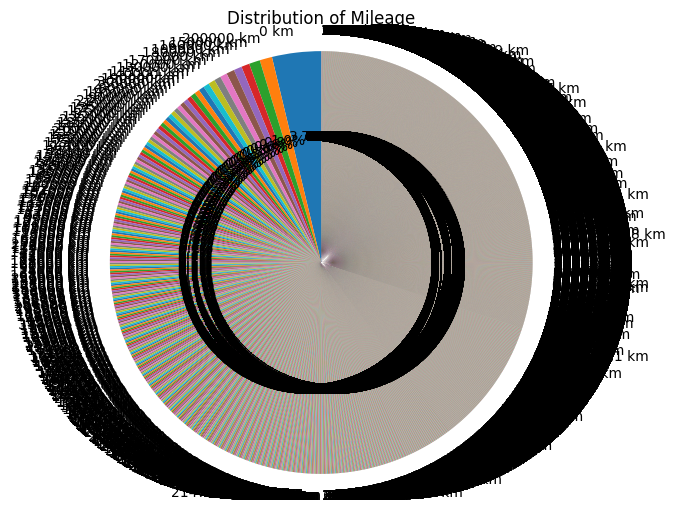

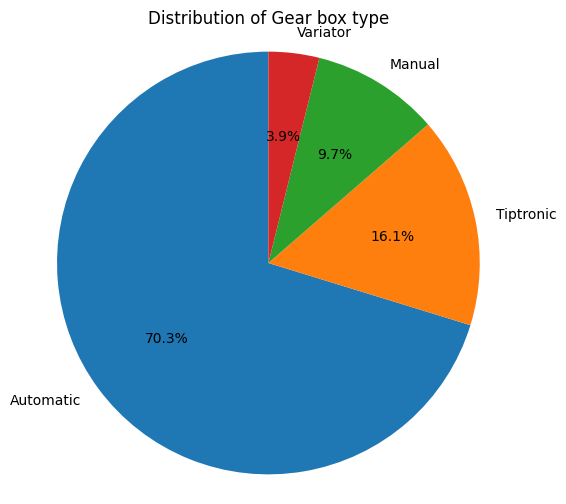

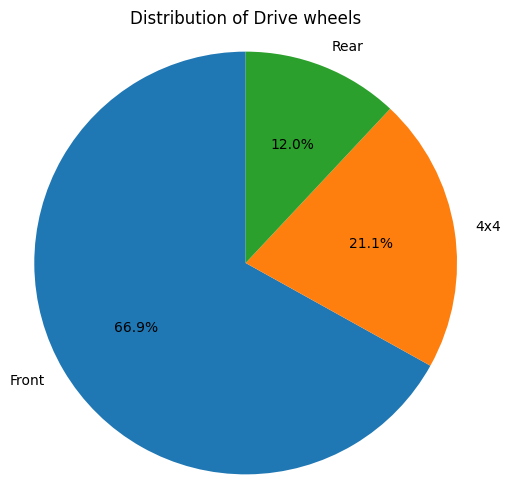

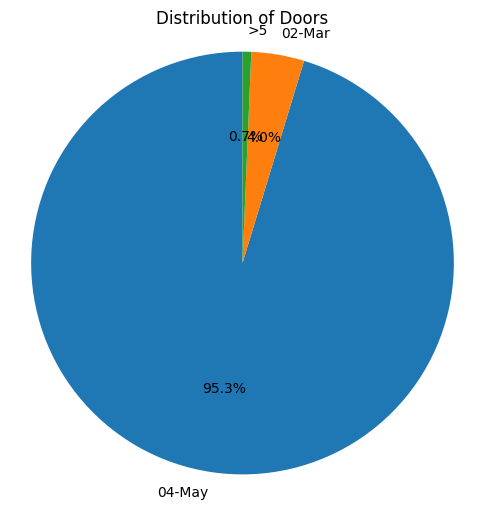

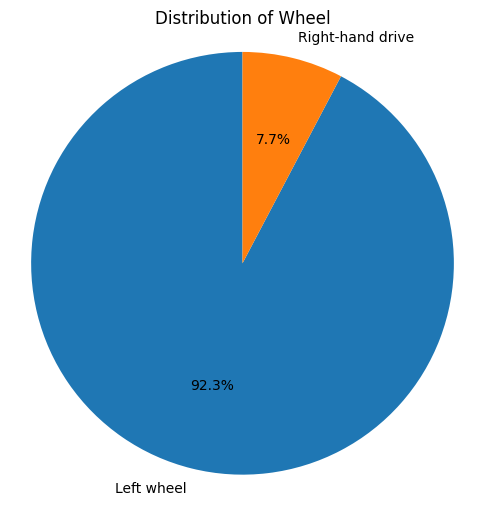

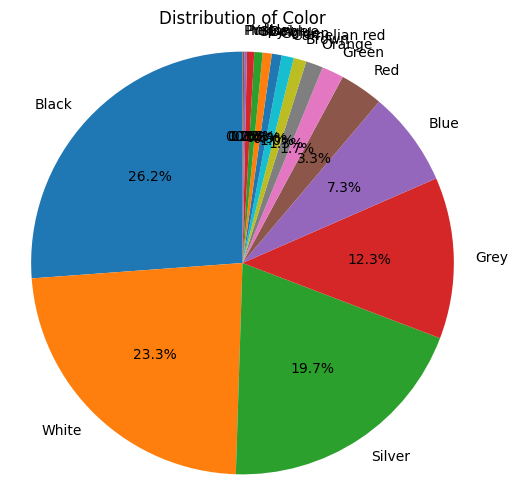

In [8]:
for col in categorical_cols:
    counts = df[col].value_counts()
    plt.figure(figsize=(6, 6))
    plt.title(f"Distribution of {col}")
    plt.pie(counts.values, labels=counts.index, autopct="%1.1f%%", startangle=90)
    plt.axis("equal")
    plt.show()

#### Conclusion
- Hyundai sells the most cars in this dataset
- prius is the most sold car
- sedan is the most sold car category
- Levy, Engine volume and mileage are incorrectly classified in categorical columns
- most cars sold have automatic gear system
- most cards have front drive wheels
- Doors data is not usable at all
- most cars have left steering wheel
- most cars sold are black with white just 3% lower than black cars

## Data Preprocessing

make a copy of dataframe

In [9]:
df_c = df.copy(deep=True)

first we will make Levy, Engine volume and mileage numerical columns from categorical columns

In [10]:
df_c["Levy"] = df_c["Levy"].replace("-", 0)
df_c["Levy"] = pd.to_numeric(df_c["Levy"], errors='coerce').fillna(0)
df_c["Engine volume"] = pd.to_numeric(
    df_c["Engine volume"]
    .astype(str)
    .str.lower()
    .str.replace(r"Turbo|t", "", regex=True)
    .str.replace(r"[^0-9\.]", "", regex=True),
    errors="coerce",
)
df_c["Mileage"] = pd.to_numeric(
    df_c["Mileage"].astype(str).str.lower().str.replace(r"[^0-9\.]", "", regex=True),
    errors="coerce",
)
df_c.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [11]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  int64  
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  float64
 10  Mileage           19237 non-null  int64  
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [12]:
numerical_cols = df_c.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df_c.select_dtypes(include=["object"]).columns
print(f"numerical cols: {numerical_cols}")
print(f"categorical cols: {categorical_cols}")

numerical cols: Index(['ID', 'Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage',
       'Cylinders', 'Airbags'],
      dtype='object')
categorical cols: Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color'],
      dtype='object')


now we will handle outliers

In [13]:
for col in numerical_cols:
    Q1 = df_c[col].quantile(0.25)
    Q3 = df_c[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df_c[col] = np.clip(df_c[col], lower_bound, upper_bound)

we will handle non normal distribution after splitting the data

let's also drop doors column

In [14]:
df_c = df_c.drop(columns="Doors", axis=1)

Now we will label encode object datatype

In [15]:
numerical_cols = df_c.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df_c.select_dtypes(include=["object"]).columns
print(f"numerical cols: {numerical_cols}")
print(f"categorical cols: {categorical_cols}")

numerical cols: Index(['ID', 'Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage',
       'Cylinders', 'Airbags'],
      dtype='object')
categorical cols: Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Wheel', 'Color'],
      dtype='object')


In [16]:
le = LabelEncoder()
for col in categorical_cols:
    df_c[col] = le.fit_transform(df_c[col])
df_c.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,45654403,13328,1399.0,32,1242,2010,4,1,2,3.5,186005.0,4.0,0,0,0,12,12
1,45542881,16621,1018.0,8,658,2011,4,0,5,3.0,192000.0,4.0,2,0,0,1,8
2,45774419,8467,0.0,21,684,2006,3,0,5,1.3,200000.0,4.0,3,1,1,1,2
3,45769185,3607,862.0,16,661,2011,4,1,2,2.5,168966.0,4.0,0,0,0,14,0
4,45809263,11726,446.0,21,684,2014,3,1,5,1.3,91901.0,4.0,0,1,0,12,4


## Feature selection

<Axes: >

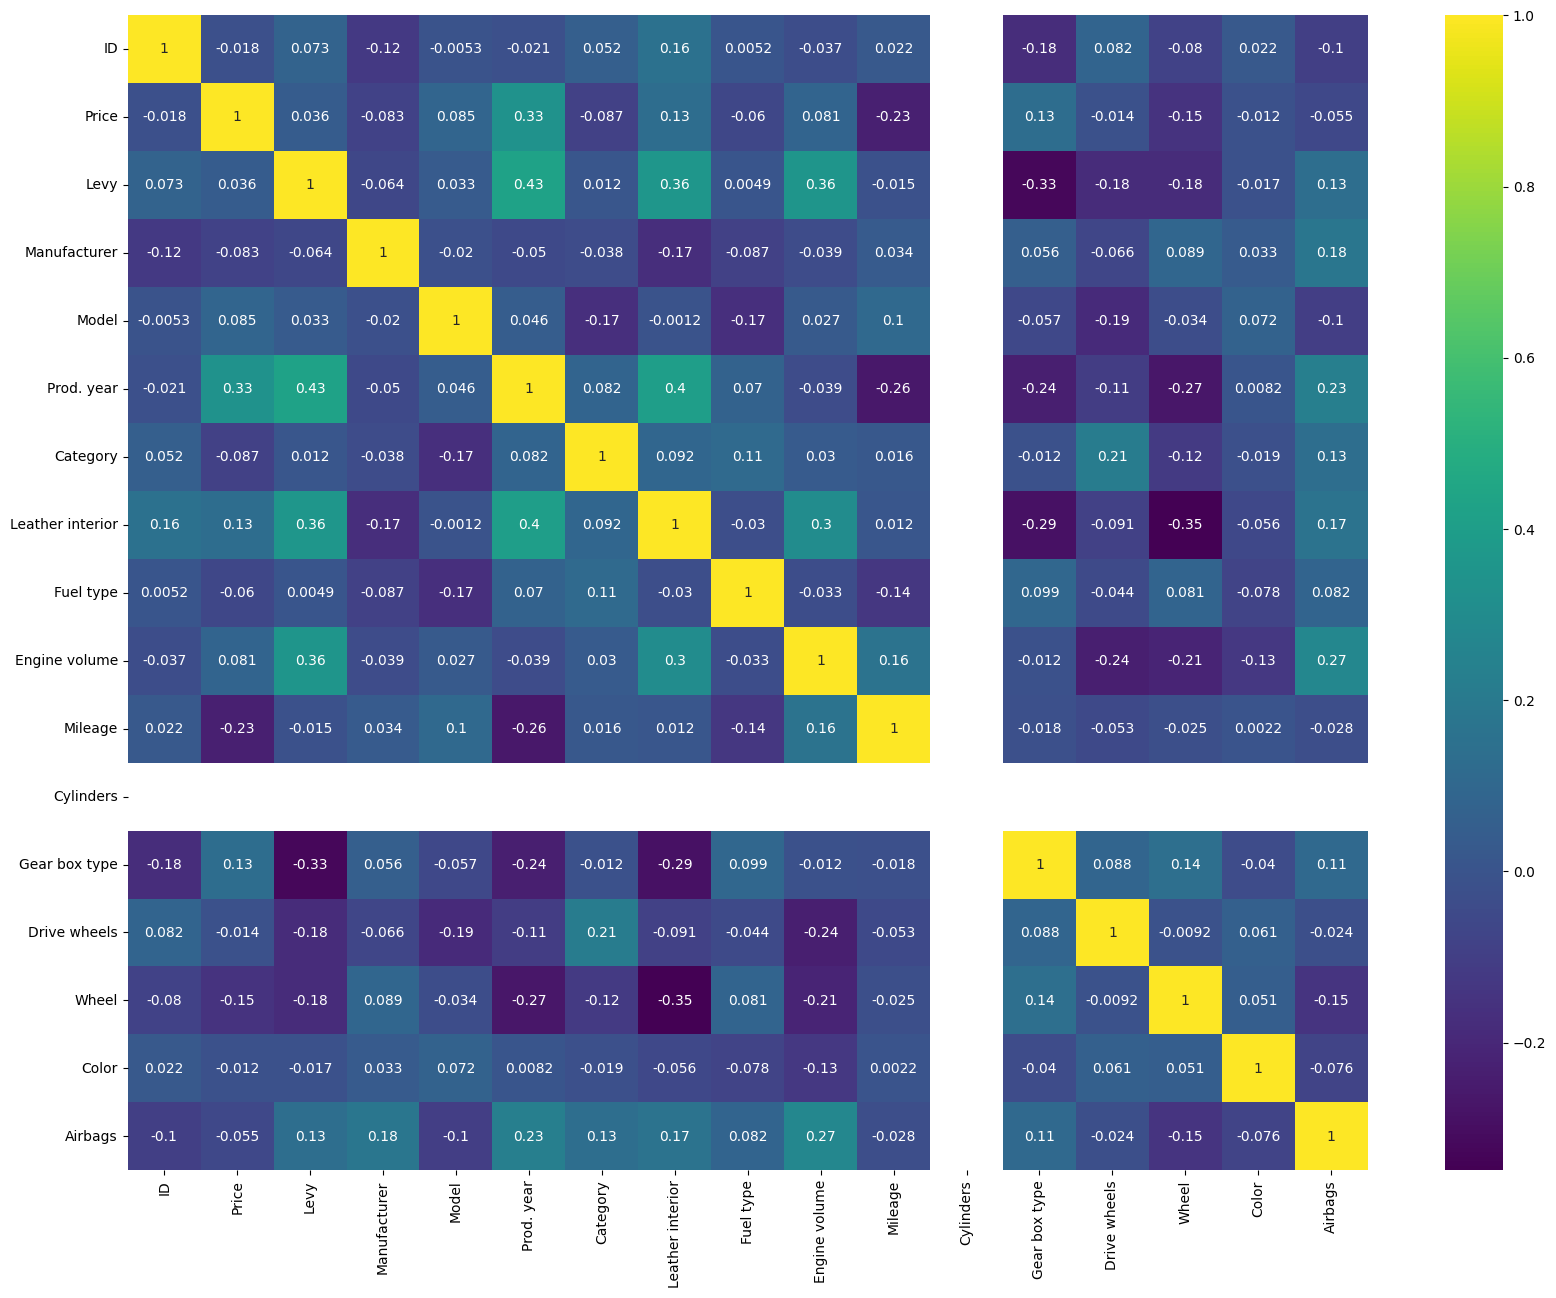

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(df_c.corr(), annot=True, cmap="viridis")

drop the useless columns

In [18]:
df_c = df_c.drop(
    columns=[
        "ID",
        "Color",
        "Drive wheels",
        "Fuel type",
        "Category",
    ], axis=1
)

In [19]:
df_c.head()

,Price,Levy,Manufacturer,Model,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Gear box type,Wheel,Airbags
0,13328,1399.0,32,1242,2010,1,3.5,186005.0,4.0,0,0,12
1,16621,1018.0,8,658,2011,0,3.0,192000.0,4.0,2,0,8
2,8467,0.0,21,684,2006,0,1.3,200000.0,4.0,3,1,2
3,3607,862.0,16,661,2011,1,2.5,168966.0,4.0,0,0,0
4,11726,446.0,21,684,2014,1,1.3,91901.0,4.0,0,0,4


In [20]:
df_c.shape

(19237, 12)

In [21]:
X = df_c.drop("Price",axis=1)
y=df_c["Price"]

## Data splitting

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Model training

### Decision Tree Regressor

In [24]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_sc, y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max

In [25]:
y_pred_dtr = dtr.predict(X_test_sc)

In [26]:
rmse_dtr = root_mean_squared_error(y_test, y_pred_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)
print(f"RMSE of Decision tree: {rmse_dtr}\nR2 Score: {r2_dtr}")

RMSE of Decision tree: 8511.476595043934
R2 Score: 0.5959678892999545


### Random Forest regression

In [27]:
rfr = RandomForestRegressor()
rfr.fit(X_train_sc, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [28]:
y_pred_rfr = rfr.predict(X_test_sc)

In [29]:
rmse_rfr = root_mean_squared_error(y_test, y_pred_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)
print(f"RMSE of Random Forest: {rmse_rfr}\nR2 Score: {r2_rfr}")

RMSE of Random Forest: 6460.109864975128
R2 Score: 0.7672520461263601


### Linear Regression

In [30]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [31]:
y_pred_lr = lr.predict(X_test_sc)

In [32]:
rmse_lr = root_mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"RMSE of Linear regression: {rmse_lr}\nR2 Score: {r2_lr}")

RMSE of Linear regression: 11465.453149338384
R2 Score: 0.2668573046278575
